# Importing Libraries

In [407]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [408]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Data Extraction & Analysis

In [410]:
# importing data from insurance.csv into a dataFrame
insurance_df = pd.read_csv('insurance.csv')

#print initial rows of the insurance dataFrame
print(insurance_df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [411]:
# size of the dataset
print(insurance_df.shape)

(1338, 7)


In [412]:
#dataset information
print(insurance_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [413]:
# Analyzing data for any missing values
print(insurance_df.isna().any())

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool


In [414]:
#Retrieving the satistical data for the insurance dataset
print(insurance_df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


# Data visualization

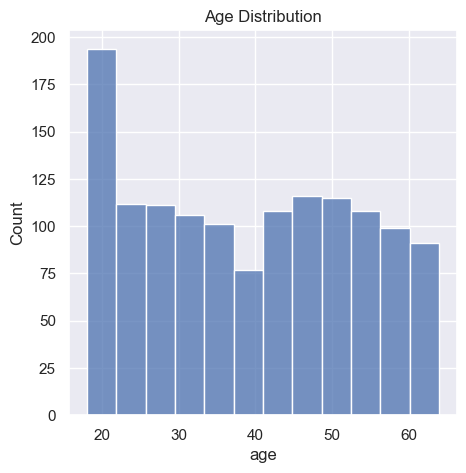

In [416]:
#Age plot
sns.set()
plt.figure(figsize=(5,5))
sns.histplot(data=insurance_df,x='age')
plt.title('Age Distribution')
plt.show()


Through this histplot, we can infer that most values in our dataset have age around 20-22

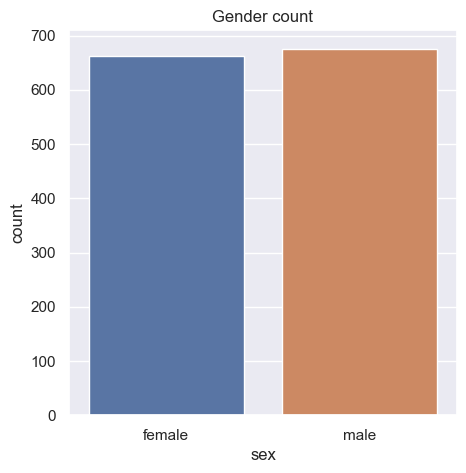

In [418]:
#Gender count plot
plt.figure(figsize=(5,5))
sns.countplot(data=insurance_df,x='sex',hue='sex')
plt.title('Gender count')
plt.show()

In [419]:
print(insurance_df['sex'].value_counts())

sex
male      676
female    662
Name: count, dtype: int64


We can infer that the dataset has approximately equal distribution for males and females

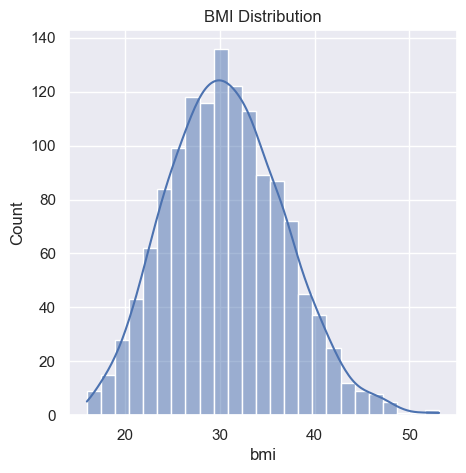

In [421]:
#BMI plot
plt.figure(figsize=(5,5))
sns.histplot(data=insurance_df,x='bmi',kde=True)
plt.title('BMI Distribution')
plt.show()

We can infer that the BMI distribution for the dataset is approximately a normal distribution

Note -  BMI normal range -->  18.5 <= BMI <= 24.9.

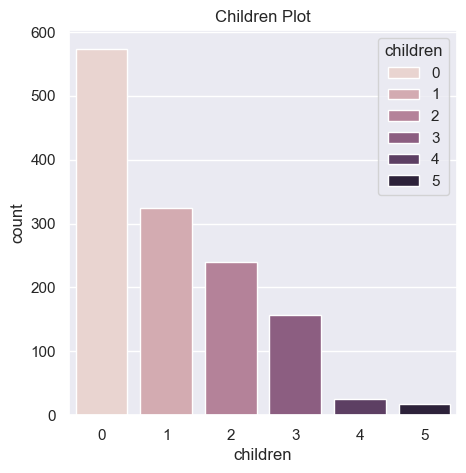

In [424]:
# Children count plot
plt.figure(figsize=(5,5))
sns.countplot(data=insurance_df,x='children',hue='children')
plt.title('Children Plot')
plt.show()

In [425]:
insurance_df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

It can be inferred that most people have no children in dataset

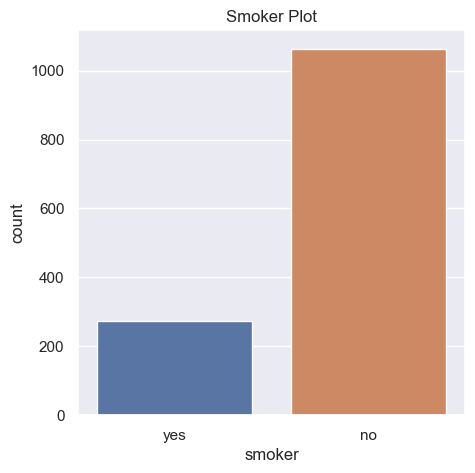

In [427]:
# Smoker count plot
plt.figure(figsize=(5,5))
sns.countplot(data=insurance_df,x='smoker',hue='smoker')
plt.title('Smoker Plot')
plt.show()

In [428]:
insurance_df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

Non-smokers are in majority than smokers in the dataset

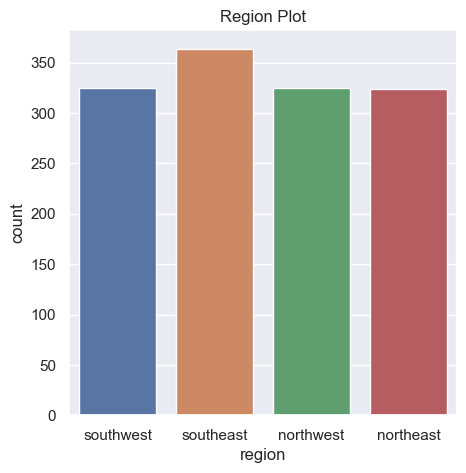

In [430]:
# Region count plot
plt.figure(figsize=(5,5))
sns.countplot(data=insurance_df,x='region',hue='region')
plt.title('Region Plot')
plt.show()

In [431]:
insurance_df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

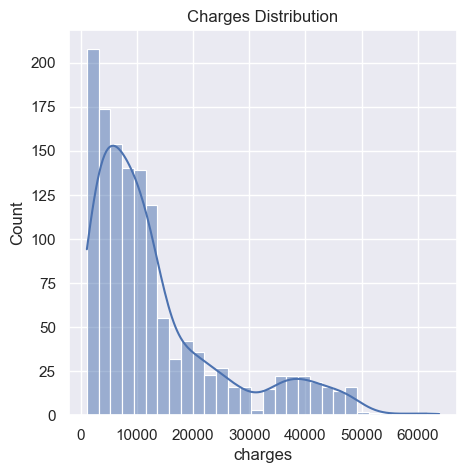

In [432]:
#Charges distribution
plt.figure(figsize=(5,5))
sns.histplot(data=insurance_df,x='charges',kde=True)
plt.title('Charges Distribution')
plt.show()

We can visualize that most insurance charges lie between $10,000 - $13,000

# Data Pre-processing

The following steps involve encoding the categorical features to numbers

In [436]:
#encoding the sex/gender column
insurance_df['sex'] = insurance_df['sex'].replace(['male','female'],[0,1])

#encoding the smoker column
insurance_df['smoker'] = insurance_df['smoker'].replace(['yes','no'],[0,1])

#encoding the region column
insurance_df['region'] = insurance_df['region'].replace(['southeast','southwest','northeast','northwest'],[0,1,2,3])

insurance_df.head()

/var/folders/7y/twlkbwpd7hzgx3dgvq31wz4h0000gn/T/ipykernel_15543/4182746513.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_df['sex'] = insurance_df['sex'].replace(['male','female'],[0,1])
/var/folders/7y/twlkbwpd7hzgx3dgvq31wz4h0000gn/T/ipykernel_15543/4182746513.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_df['smoker'] = insurance_df['smoker'].replace(['yes','no'],[0,1])
/var/folders/7y/twlkbwpd7hzgx3dgvq31wz4h0000gn/T/ipykernel_15543/4182746513.py:8: FutureWarning: Downcasting behavior in `replace

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


Now, we will split the features and target variable

In [438]:
X = insurance_df.loc[:,['age','sex','bmi','children','smoker','region']] #Features
Y = insurance_df['charges'] #Target variable

In [439]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [440]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Now, we will split the data into training data and testing data

In [442]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [443]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [444]:
print(len(Y), len(Y_train), len(Y_test))

1338 1070 268


# Model Training

In [446]:
#Loading the Linear Regression model
regressor = LinearRegression()

#Fit the training data to the model
regressor.fit(X_train, Y_train)

LinearRegression()

# Model Validation

In [448]:
#prediction on training data
prediction_training_data = regressor.predict(X_train)

In [449]:
# R2 value / Coefficient of determination to test model performance
r2_training = metrics.r2_score(Y_train, prediction_training_data)
print('R2 train data value: ', r2_training)

R2 train data value:  0.751505643411174


In [450]:
#prediction on test data
prediction_test_data = regressor.predict(X_test)

In [451]:
# R2 value / Coefficient of determination to test model performance
r2_test = metrics.r2_score(Y_test, prediction_test_data)
print('R2 test data value: ', r2_test)

R2 test data value:  0.7447273869684077


# Implementing Insurance Cost Recommendation System

In [453]:
input = (31,1,25.74,0,1,0) 

feature_names = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

# Convert the input data to a DataFrame
input_df = pd.DataFrame([input_data], columns=feature_names)

#Predicting insurance cost for the given input
predicted_insurance_cost = regressor.predict(input_df)
print(predicted_insurance_cost)

[3760.0805765]


In [454]:
print('The insurance cost is: $', round(predicted_insurance_cost[0],2)) 

The insurance cost is: $ 3760.08
